# **04 - Insurance Dataset**
___

### ***Ctrl Z:***
- nombre1
- nombre2
- nombre3
- nombre4

In [1]:
# Se importan las librerías necesarias
library(tidyverse)
library(ggridges)

# Cambia tamaño del plot
options(repr.plot.width=16, repr.plot.height=12)

# Directorio de trabajo y nombre de archivo
data_folder <- "dataset"
file_name <- "Insurance.csv"

# Se importa el dataset
df_seguros <- read.csv(file.path(data_folder, file_name), dec=",")

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.8     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.1
v readr   2.1.2     v forcats 0.5.2
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
# Se agrupan los datos por regiones y fumadores simultaneamente
fumadores_x_region <- group_by(df_seguros, region, smoker)
# Al dataset anterior se le agrega una variable para contabilizar los fumadores en cada region
fumador_grupo <- mutate(fumadores_x_region, fumadores=n())
# Cantidad de fumadores y no fumadores por region
subtotal_region <- summarise(fumador_grupo, cantidad=n())
total_region <- group_by(subtotal_region, region) %>% summarise(Total=sum(cantidad))
porcentaje <- group_by(subtotal_region, region) %>% summarise(porcentaje=cantidad/sum(cantidad)*100)

`summarise()` has grouped output by 'region'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'region'. You can override using the
`.groups` argument.


In [3]:
subtotal_region

region,smoker,cantidad
<chr>,<chr>,<int>
northeast,no,257
northeast,yes,67
northwest,no,267
northwest,yes,58
southeast,no,273
southeast,yes,91
southwest,no,267
southwest,yes,58


In [4]:
total_region

region,Total
<chr>,<int>
northeast,324
northwest,325
southeast,364
southwest,325


In [5]:
porcentaje

region,porcentaje
<chr>,<dbl>
northeast,79.32099
northeast,20.67901
northwest,82.15385
northwest,17.84615
southeast,75.00000
southeast,25.00000
southwest,82.15385
southwest,17.84615


In [6]:
df_fumyob <- mutate(df_seguros, obesidad= bmi>=30)
# Se agrupan los datos por regiones y fumadores simultaneamente
fumyob_x_region <- group_by(df_fumyob, region, smoker, obesidad)
# Al dataset anterior se le agrega una variable para contabilizar los fumadores en cada region
fumyob_grupo <- summarise(fumyob_x_region, fumadores=sum(smoker=="yes"), no_fumadores=sum(smoker=="no"))
porc_fumyob <- group_by(fumyob_grupo, region) %>% summarise(smoker, obesidad,
    porcentaje = (fumadores/sum(fumadores+no_fumadores))*100 + (no_fumadores/sum(fumadores+no_fumadores))*100)

# Costos de seguro
# **no implica ganancia de la empresa**
cargos_fumyob <- group_by(df_fumyob, region, smoker, obesidad) %>% mutate(ganancias=sum(charges)) %>%
    summarise(ganancia=unique(ganancias))
cargos <- group_by(df_fumyob, region) %>% mutate(gcias_region=sum(charges)) %>% summarise(gcias_region=unique(gcias_region))

`summarise()` has grouped output by 'region', 'smoker'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'region'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'region', 'smoker'. You can override using
the `.groups` argument.


In [7]:
tabla <- merge(porc_fumyob, merge(cargos_fumyob, cargos)) %>% mutate(porc_gcias=ganancia/gcias_region*100)

In [8]:
tabla

region,smoker,obesidad,porcentaje,ganancia,gcias_region,porc_gcias
<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
northeast,no,FALSE,44.135802,1183610.2,4343669,27.24909
northeast,no,TRUE,35.185185,1171931.5,4343669,26.98022
northeast,yes,FALSE,11.728395,791146.5,4343669,18.21379
northeast,yes,TRUE,8.950617,1196980.4,4343669,27.55690
northwest,no,FALSE,43.692308,1142479.4,4035712,28.30924
northwest,no,TRUE,38.461538,1142096.4,4035712,28.29975
northwest,yes,FALSE,10.769231,775354.7,4035712,19.21234
northwest,yes,TRUE,7.076923,975781.5,4035712,24.17867
southeast,no,FALSE,24.175824,687036.0,5363690,12.80902


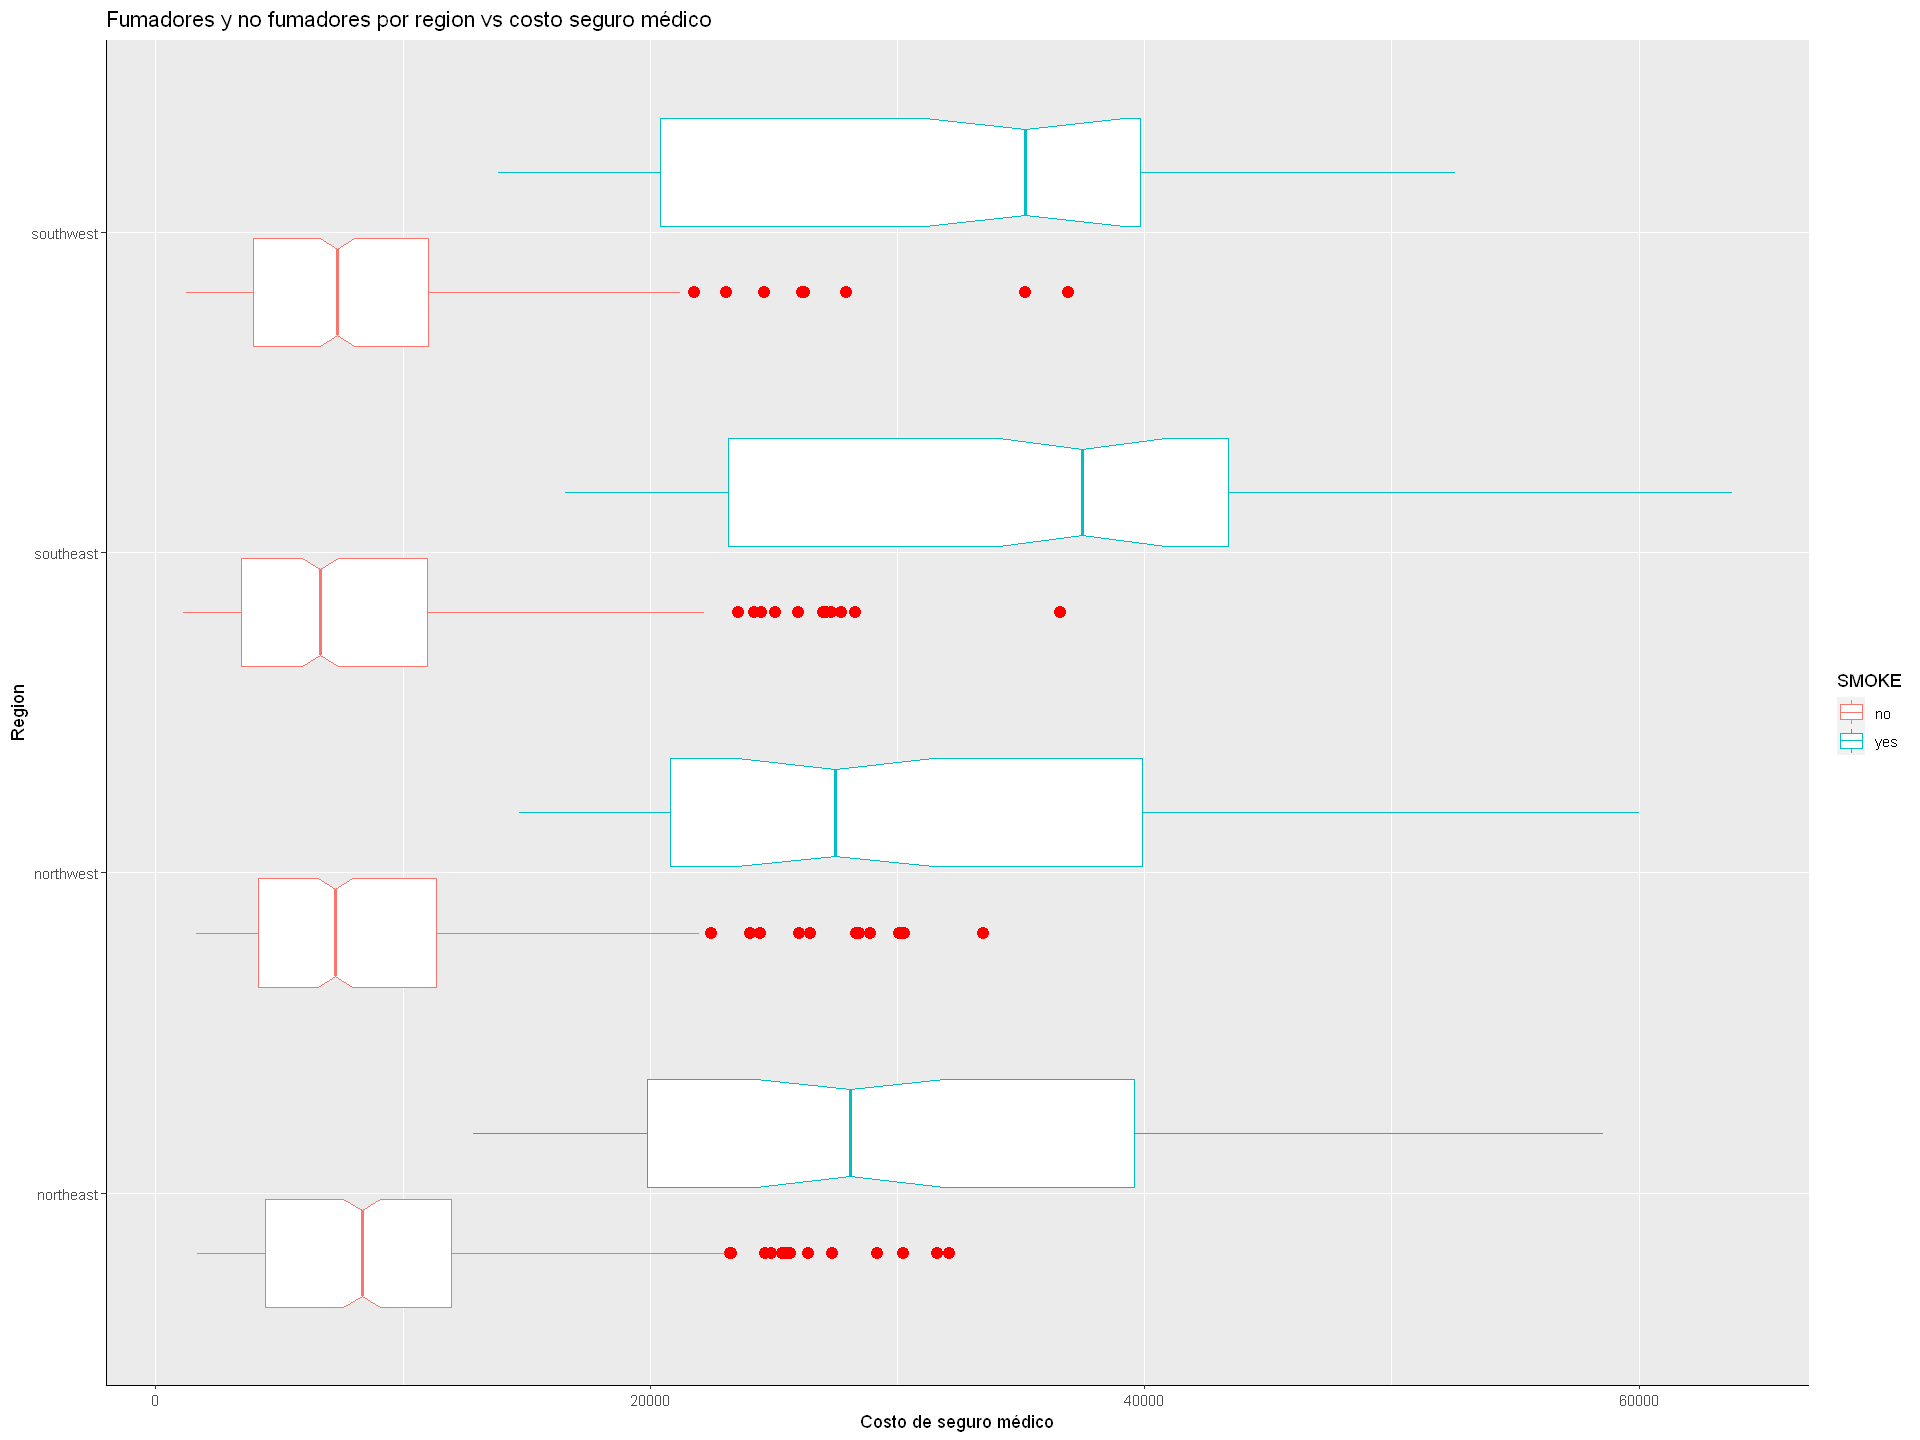

In [9]:
# Gráfico Fumadores / No Fumadores vs Costo Seguro Médico por region
ggplot(data=fumadores_x_region, aes(x=charges, y=region, color=factor(smoker))) +
    # Colores y forma del boxplot
    geom_boxplot(outlier.colour = "red", outlier.fill="red", outlier.size=3,
                 notch=TRUE, notchwidth = 0.8) +
    labs(color = 'SMOKE') +
    # Etiqueta de la variable discreta
    scale_y_discrete(name = "Region") +
    # Etiqueta de la variable continua
    scale_x_continuous(name = "Costo de seguro médico") +
    # Título
    ggtitle("Fumadores y no fumadores por region vs costo seguro médico") +
    # Personalización del tema
    theme(axis.line = element_line(colour = "black", size = 0.5))
    # Formato de texto

In [10]:
# Se agrupan los datos por obesidad con BMI >= 30
# Gráfico Fumadores / No Fumadores vs Costo Seguro Médico con BMI como color
fumadores_y_obesos <- mutate(df_seguros, obesidad = bmi>=30) %>%
  group_by(obesidad, smoker)

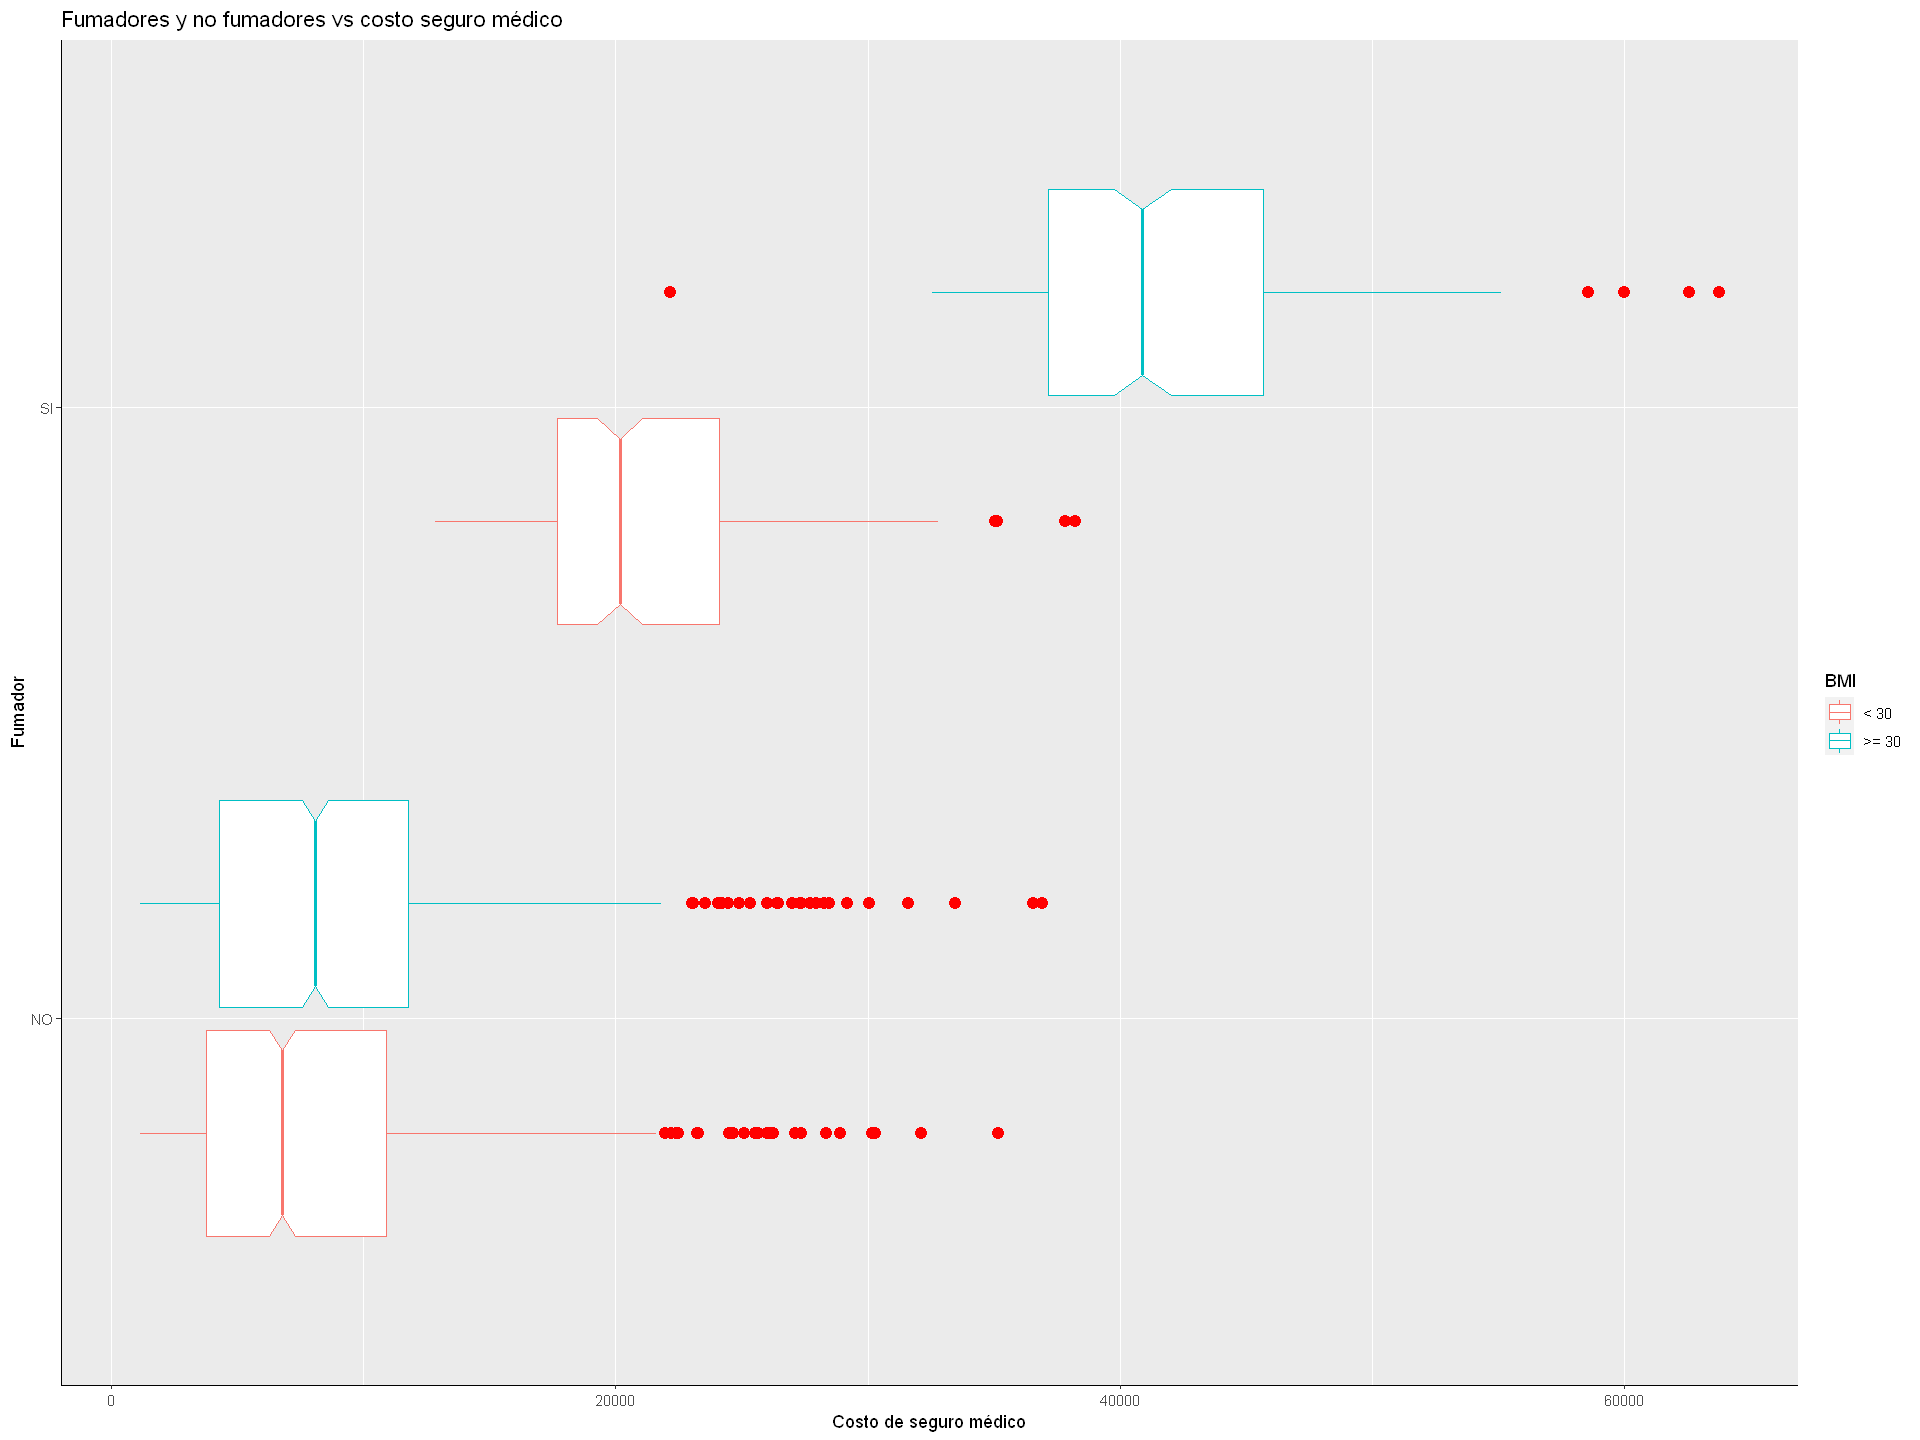

In [11]:
# Gráfico Fumadores / No Fumadores vs Costo Seguro Médico con BMI como color
ggplot(data=fumadores_y_obesos, aes(x=charges, y=smoker, color = obesidad)) +
    geom_boxplot(outlier.colour = "red", outlier.fill="red", outlier.size=3, 
                 notch=TRUE, notchwidth = 0.8) +
    labs(
        x = 'Costo de seguro médico',
        title = 'Fumadores y no fumadores vs costo seguro médico',
        color = 'BMI'
    ) +
    scale_color_discrete(labels=c('< 30','>= 30')) +
    # Etiqueta de la variable discreta
    scale_y_discrete('Fumador', labels=c('NO','SI')) +
    # Personalización del tema
    theme(axis.line = element_line(colour = "black", size = 0.5))

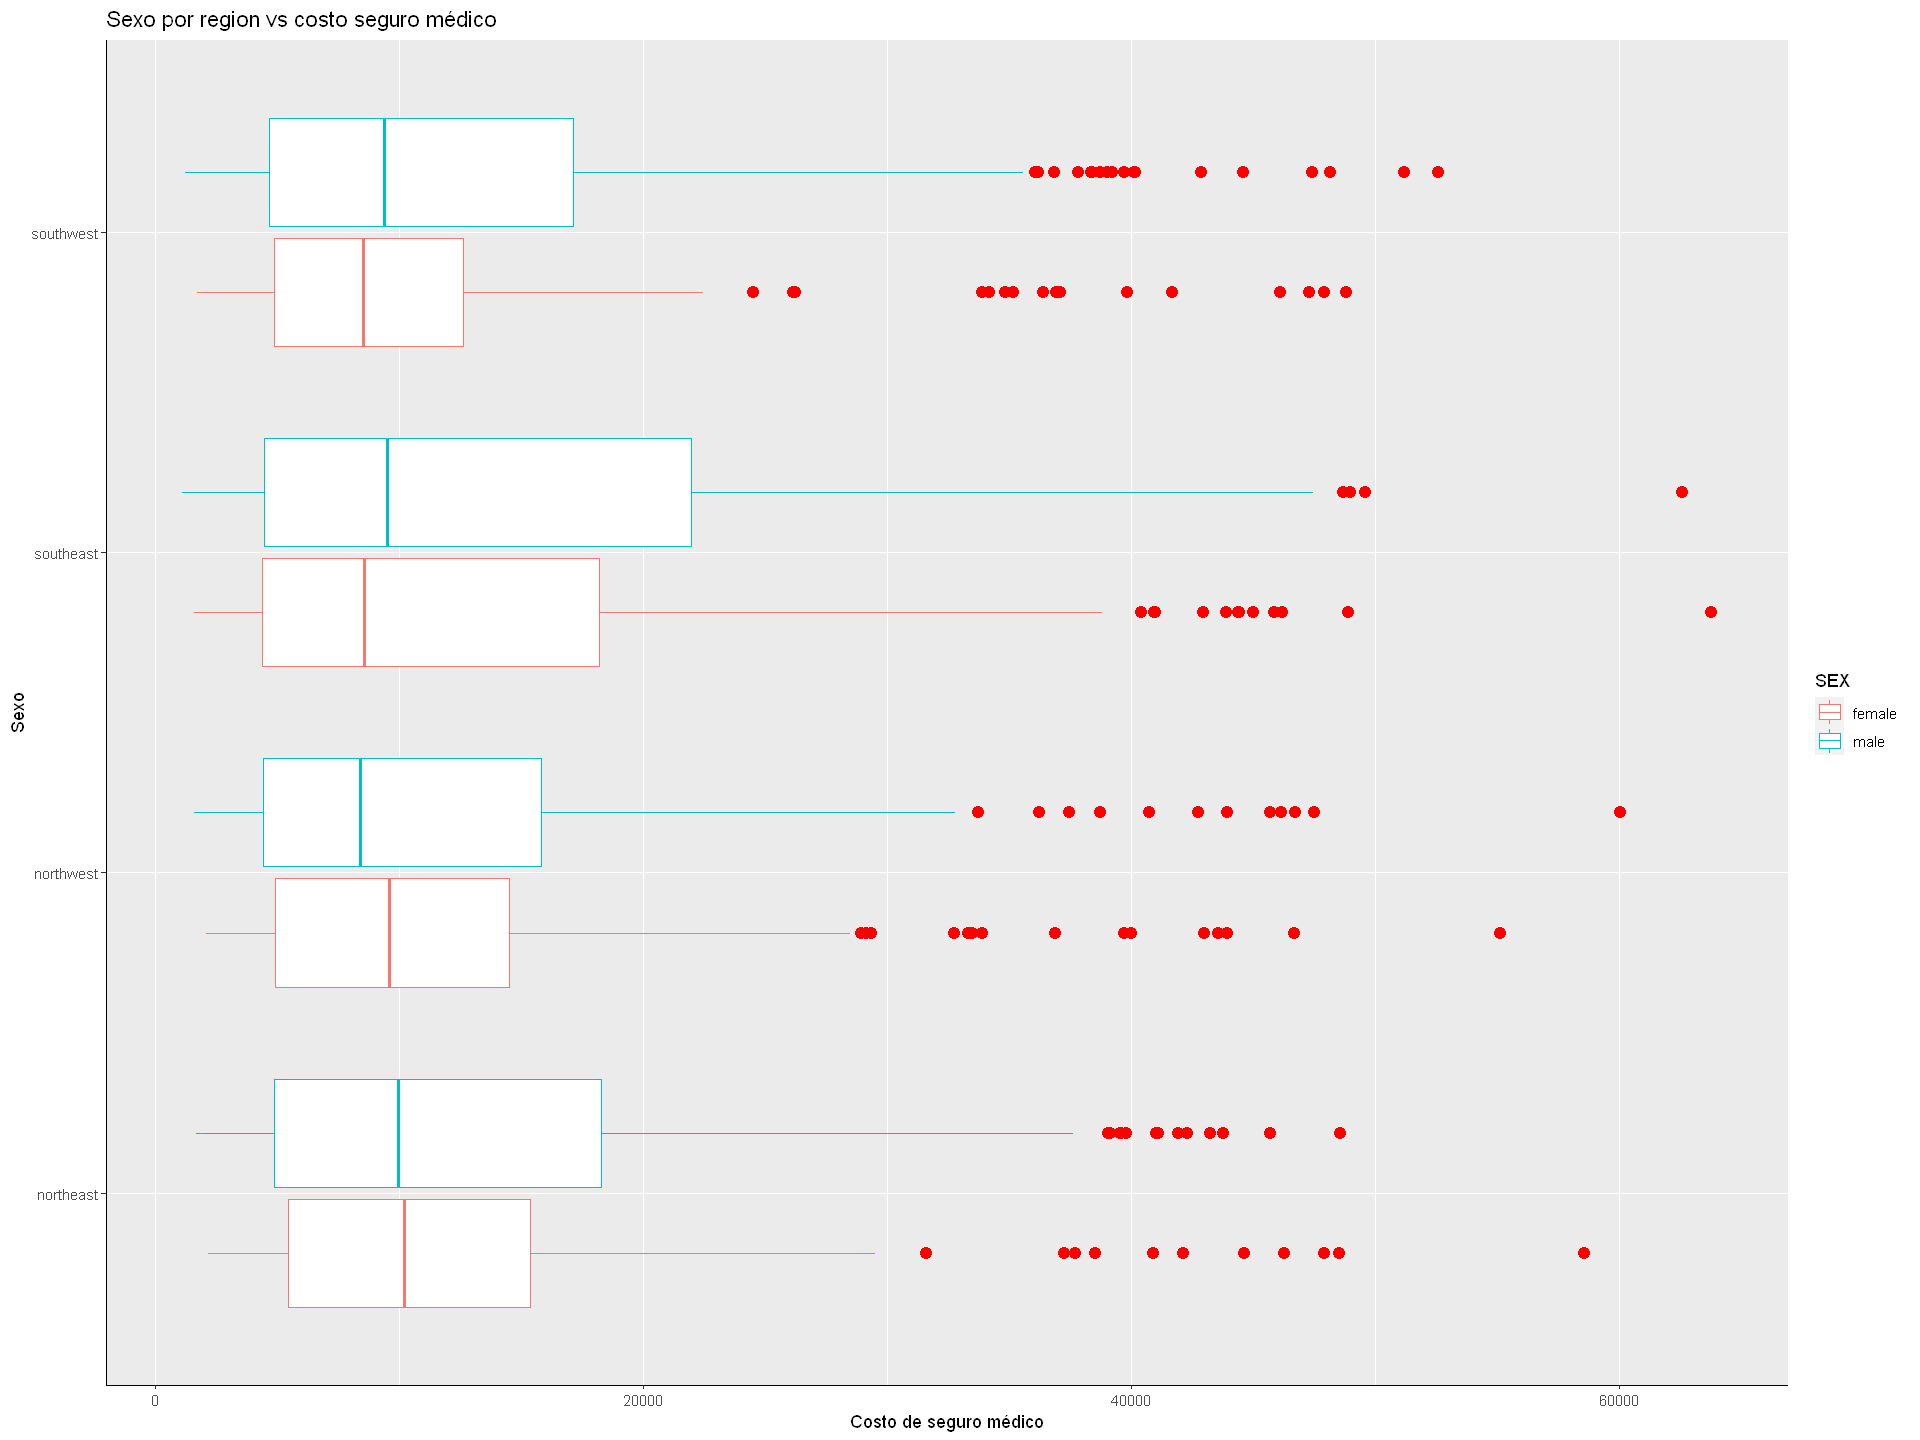

In [12]:
# Gráfico de Sexo vs Costo Seguro Médico por region
ggplot(data=fumadores_y_obesos, aes(x=charges, y=region, color=factor(sex))) +
    # Colores y forma del boxplot
    geom_boxplot(outlier.colour = "red", outlier.fill="red", outlier.size=3) +
    labs(color = 'SEX') +
    # Etiqueta de la variable discreta
    scale_y_discrete(name = "Sexo") +
    # Etiqueta de la variable continua
    scale_x_continuous(name = "Costo de seguro médico") +
    # Título
    ggtitle("Sexo por region vs costo seguro médico") +
    # Personalización del tema
    theme(axis.line = element_line(colour = "black", size = 0.5))

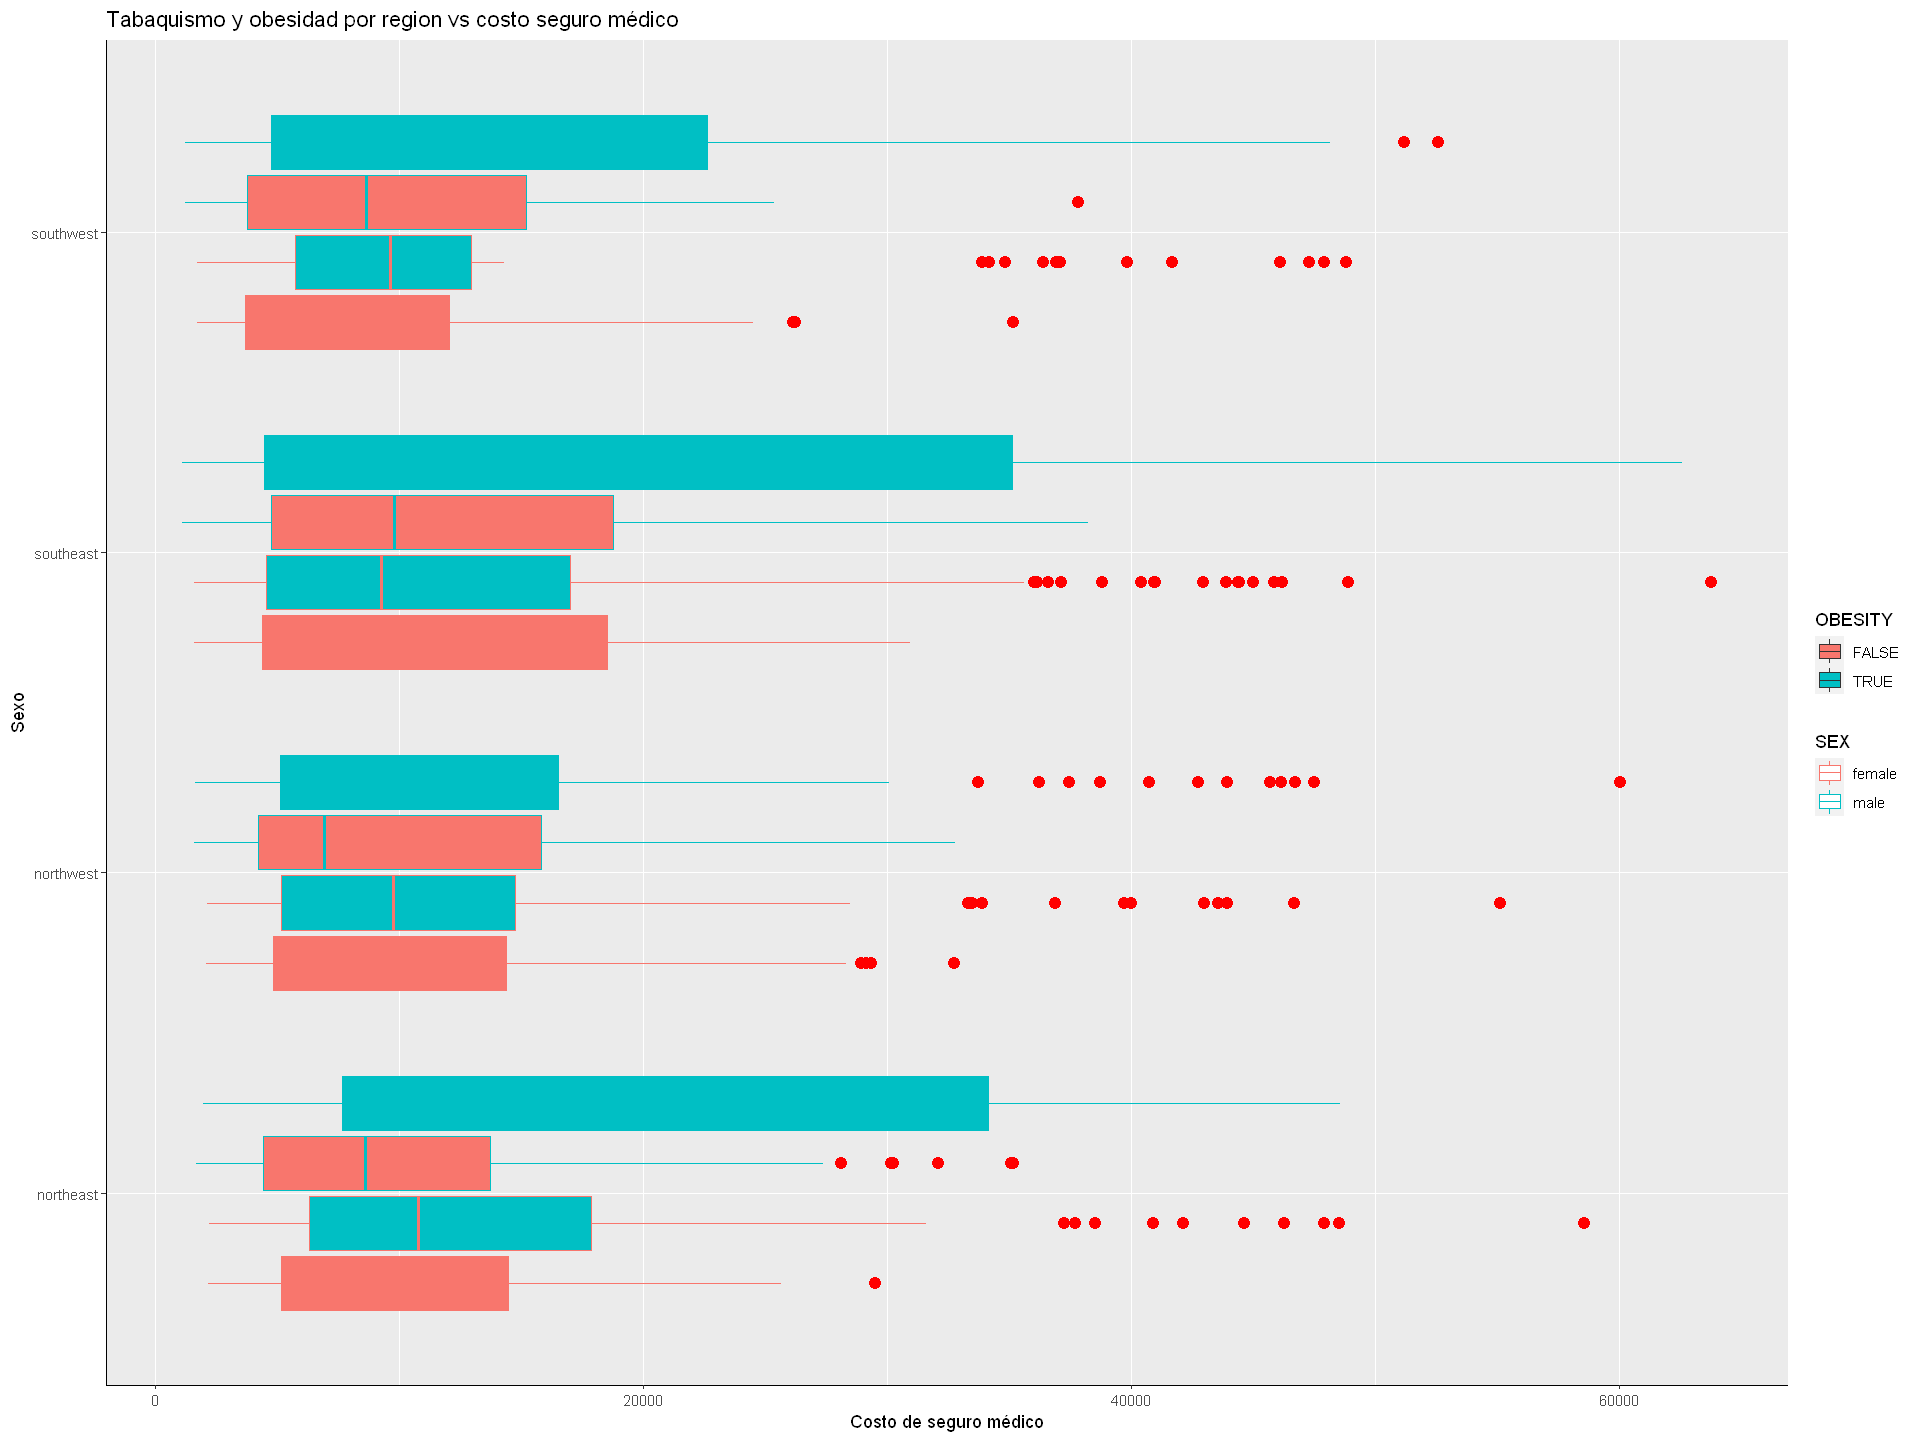

In [13]:
# Gráfico de Sexo vs Costo Seguro Médico por region
ggplot(data=fumadores_y_obesos, aes(x=charges, y=region, color=factor(sex), fill=factor(obesidad))) +
    # Colores y forma del boxplot
    geom_boxplot(outlier.colour = "red", outlier.fill="red", outlier.size=3) +
    labs(color = 'SEX', fill = 'OBESITY') +
    # Etiqueta de la variable discreta
    scale_y_discrete(name = "Sexo") +
    # Etiqueta de la variable continua
    scale_x_continuous(name = "Costo de seguro médico") +
    # Título
    ggtitle("Tabaquismo y obesidad por region vs costo seguro médico") +
    # Personalización del tema
    theme(axis.line = element_line(colour = "black", size = 0.5))

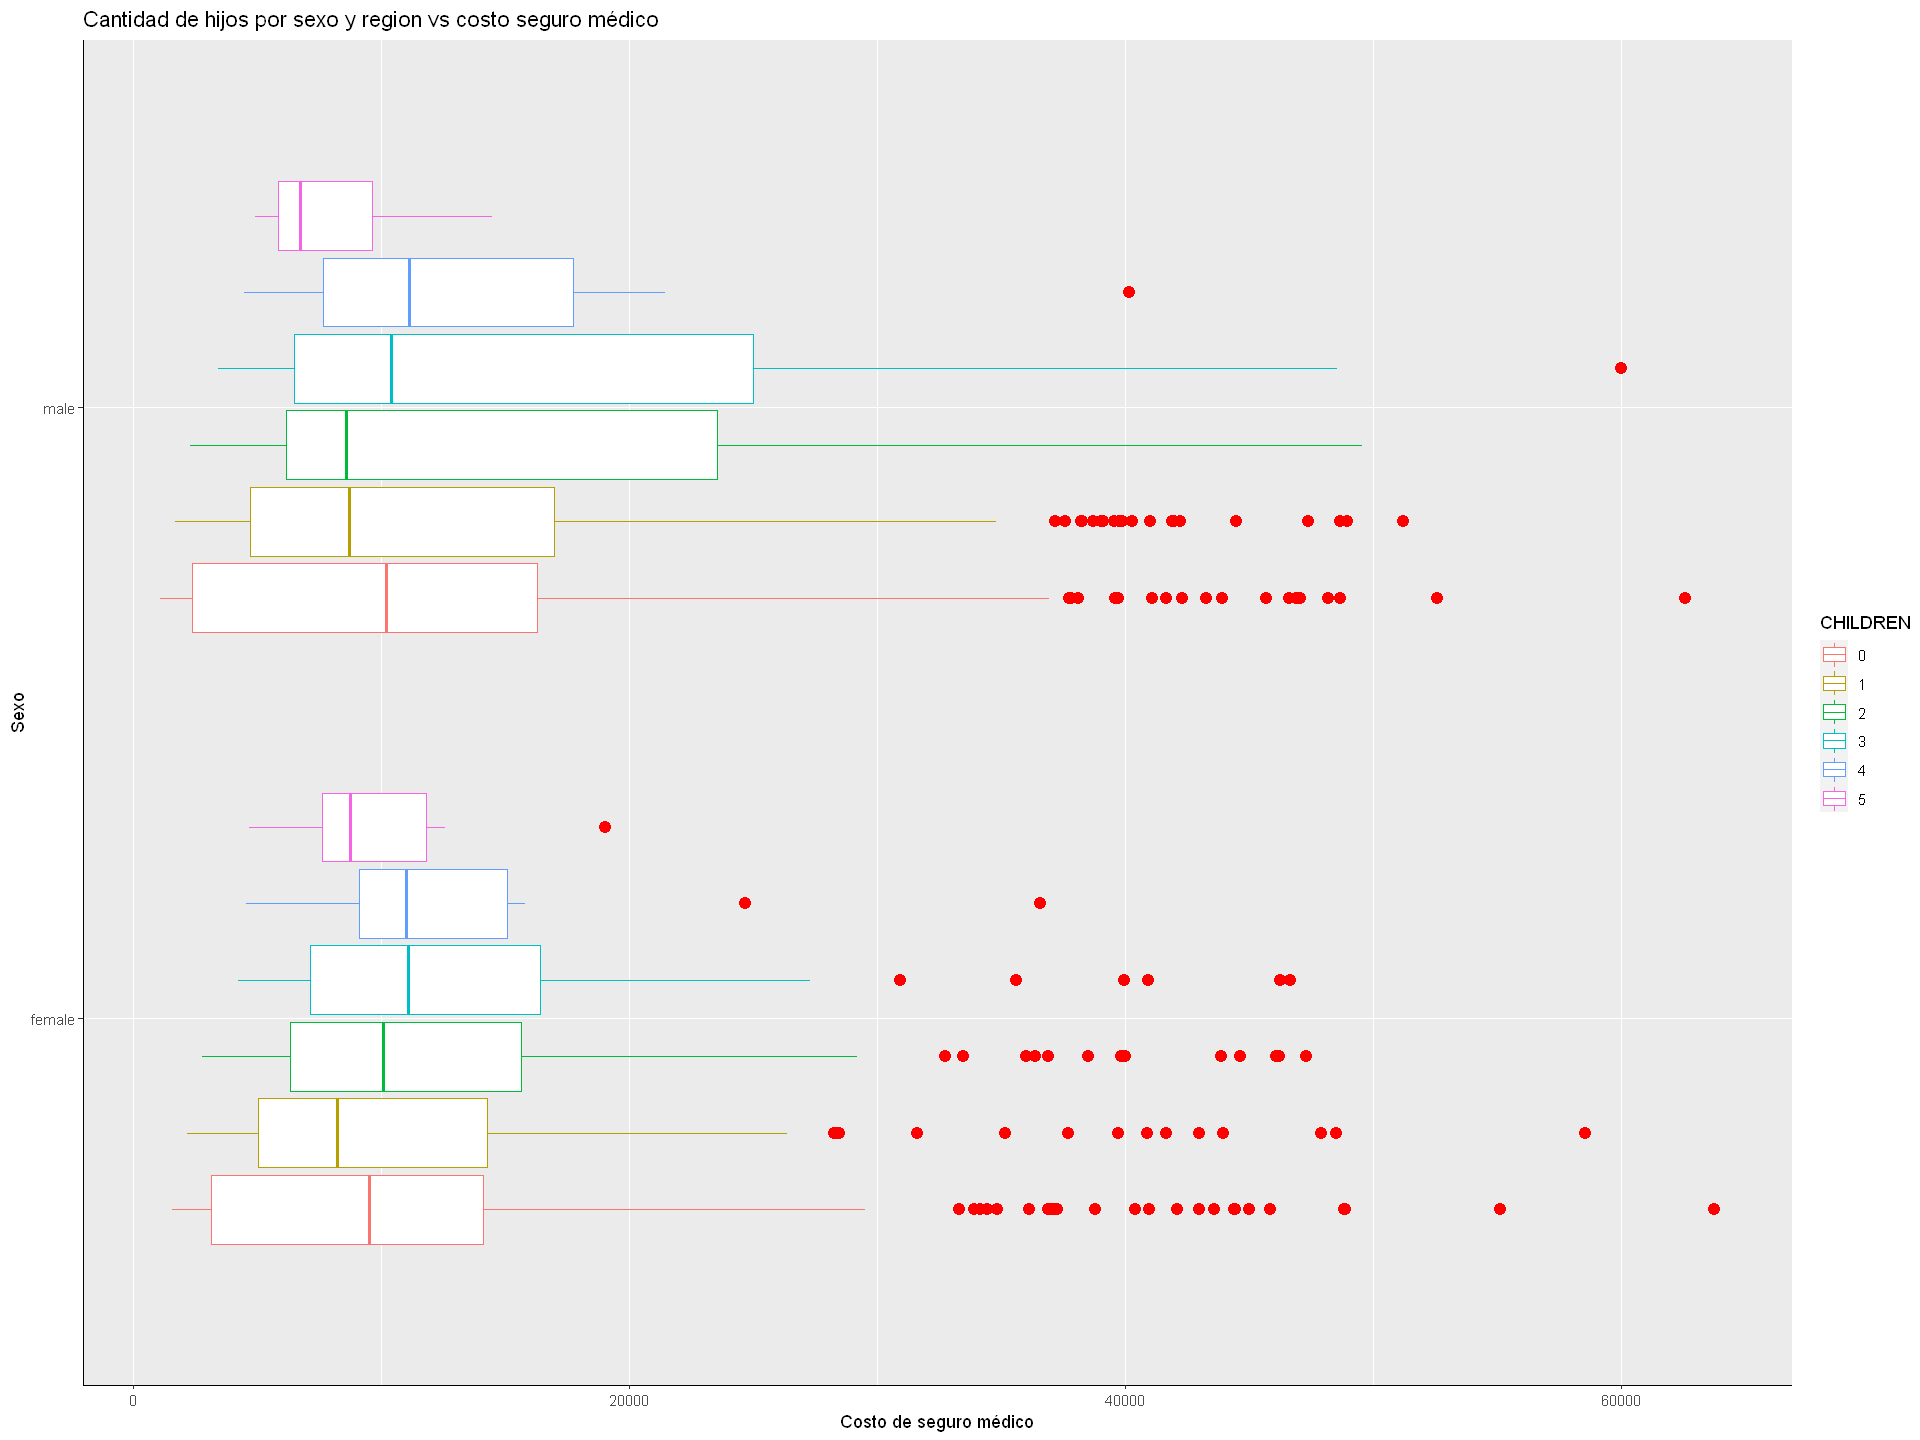

In [14]:
# Gráfico Fumadores / No Fumadores vs Costo Seguro Médico por region
ggplot(data=fumadores_y_obesos, aes(x=charges, y=sex, color=factor(children))) +
    # Colores y forma del boxplot
    geom_boxplot(outlier.colour = "red", outlier.fill="red", outlier.size=3) +
    labs(color = 'CHILDREN') +
    # Etiqueta de la variable discreta
    scale_y_discrete(name = "Sexo") +
    # Etiqueta de la variable continua
    scale_x_continuous(name = "Costo de seguro médico") +
    # Título
    ggtitle("Cantidad de hijos por sexo y region vs costo seguro médico") +
    # Personalización del tema
    theme(axis.line = element_line(colour = "black", size = 0.5))
    # Formato de texto

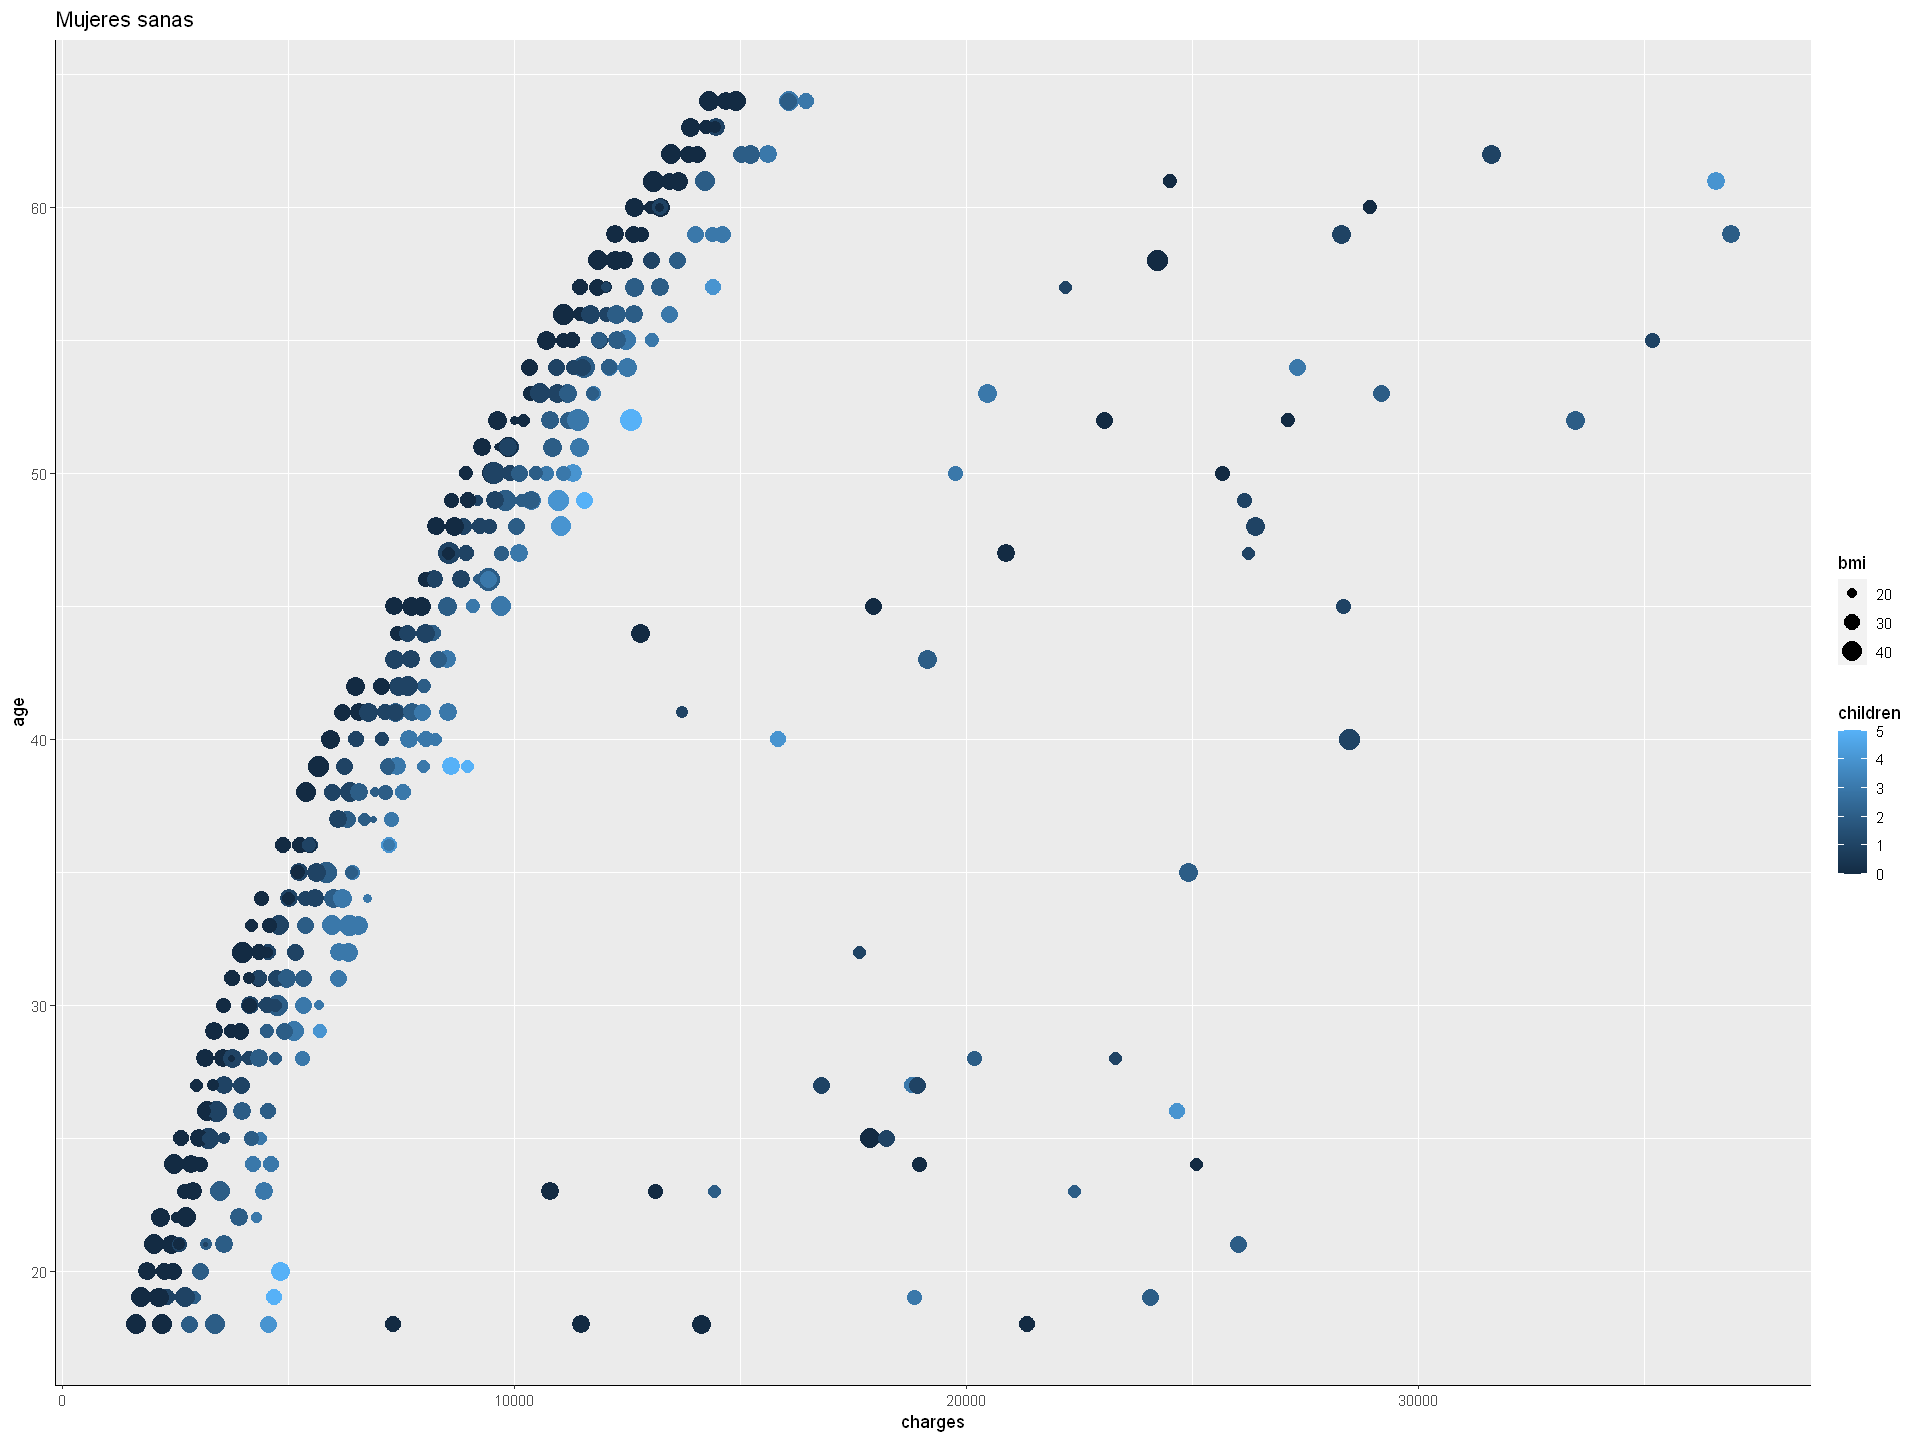

In [15]:
# sin linea de tendencia
mujeres_sanas <- group_by(df_seguros, sex, bmi, smoker, region, children, age)
mujeres_sanas <- filter(mujeres_sanas, sex=="female", smoker=="no")

ggplot(data=mujeres_sanas, aes(x=charges, y=age, color=children)) +
    # Colores y forma del boxplot
    geom_point(aes(size=bmi)) +
    # Título
    ggtitle("Mujeres sanas") +
    # Personalización del tema
    theme(axis.line = element_line(colour = "black", size = 0.5))
    # Formato de texto

`geom_smooth()` using formula 'y ~ x'



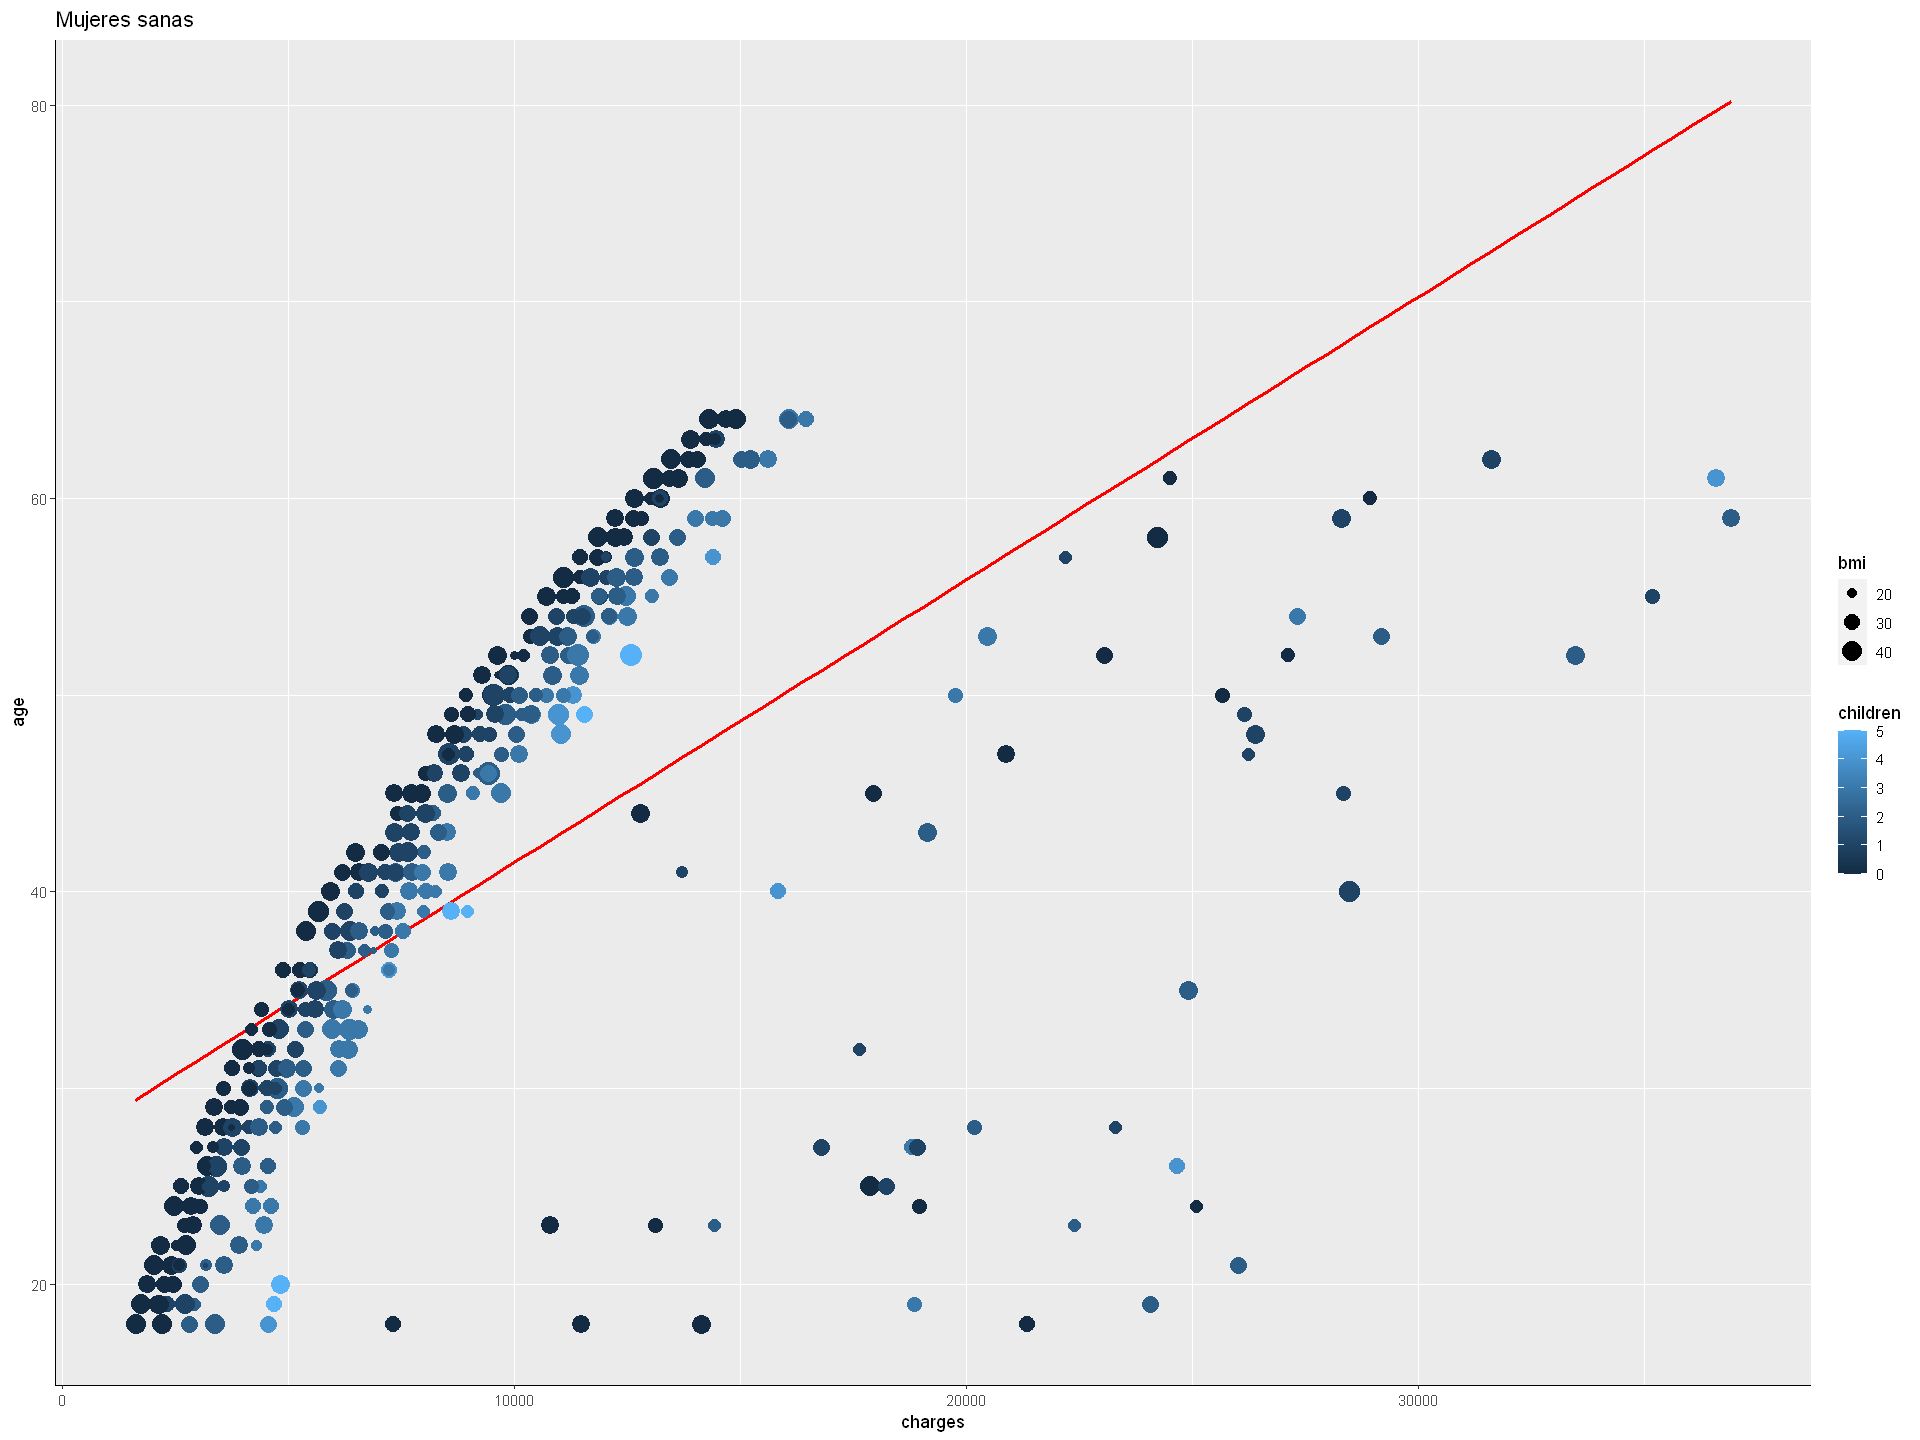

In [16]:
# con linea de tendencia
mujeres_sanas <- group_by(df_seguros, sex, bmi, smoker, region, children, age)
mujeres_sanas <- filter(mujeres_sanas, sex=="female", smoker=="no")

ggplot(data=mujeres_sanas, aes(x=charges, y=age, color=children)) +
    geom_smooth(method=lm , color="red", fill="#69b3a2", se=FALSE) +
    # Colores y forma del boxplot
    geom_point(aes(size=bmi)) +
    # Título
    ggtitle("Mujeres sanas") +
    # Personalización del tema
    theme(axis.line = element_line(colour = "black", size = 0.5))
    # Formato de texto

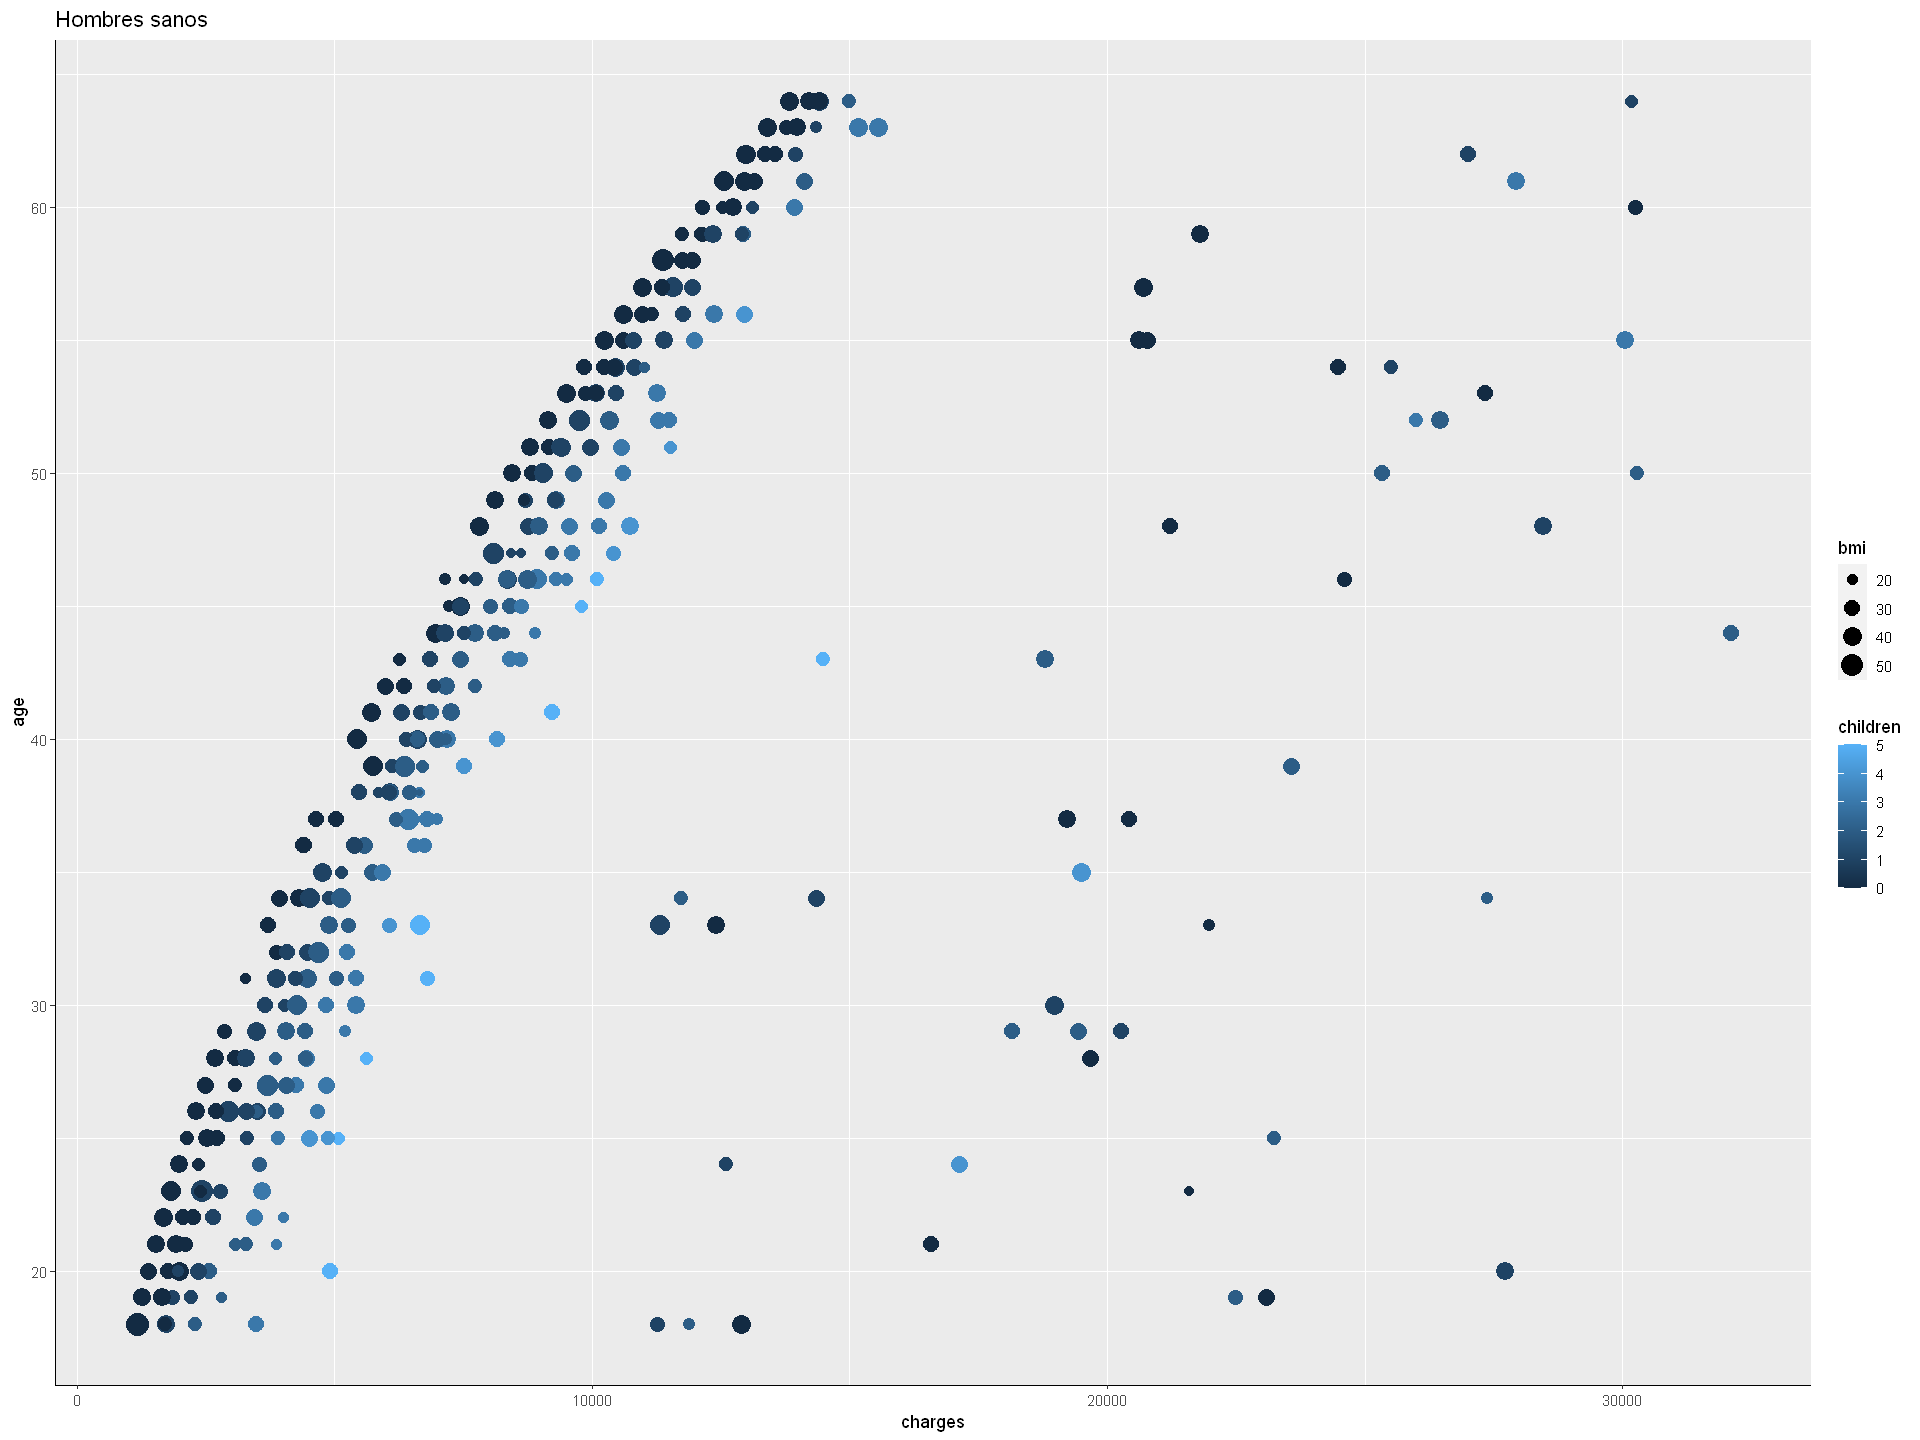

In [17]:
hombres_sanos <- group_by(df_seguros, sex, bmi, smoker, region, children, age)
hombres_sanos <- filter(hombres_sanos, sex=="male", smoker=="no")

ggplot(data=hombres_sanos, aes(x=charges, y=age, color=children)) +
    # Colores y forma del boxplot
    geom_point(aes(size=bmi)) +
    # Título
    ggtitle("Hombres sanos") +
    # Personalización del tema
    theme(axis.line = element_line(colour = "black", size = 0.5))
    # Formato de texto

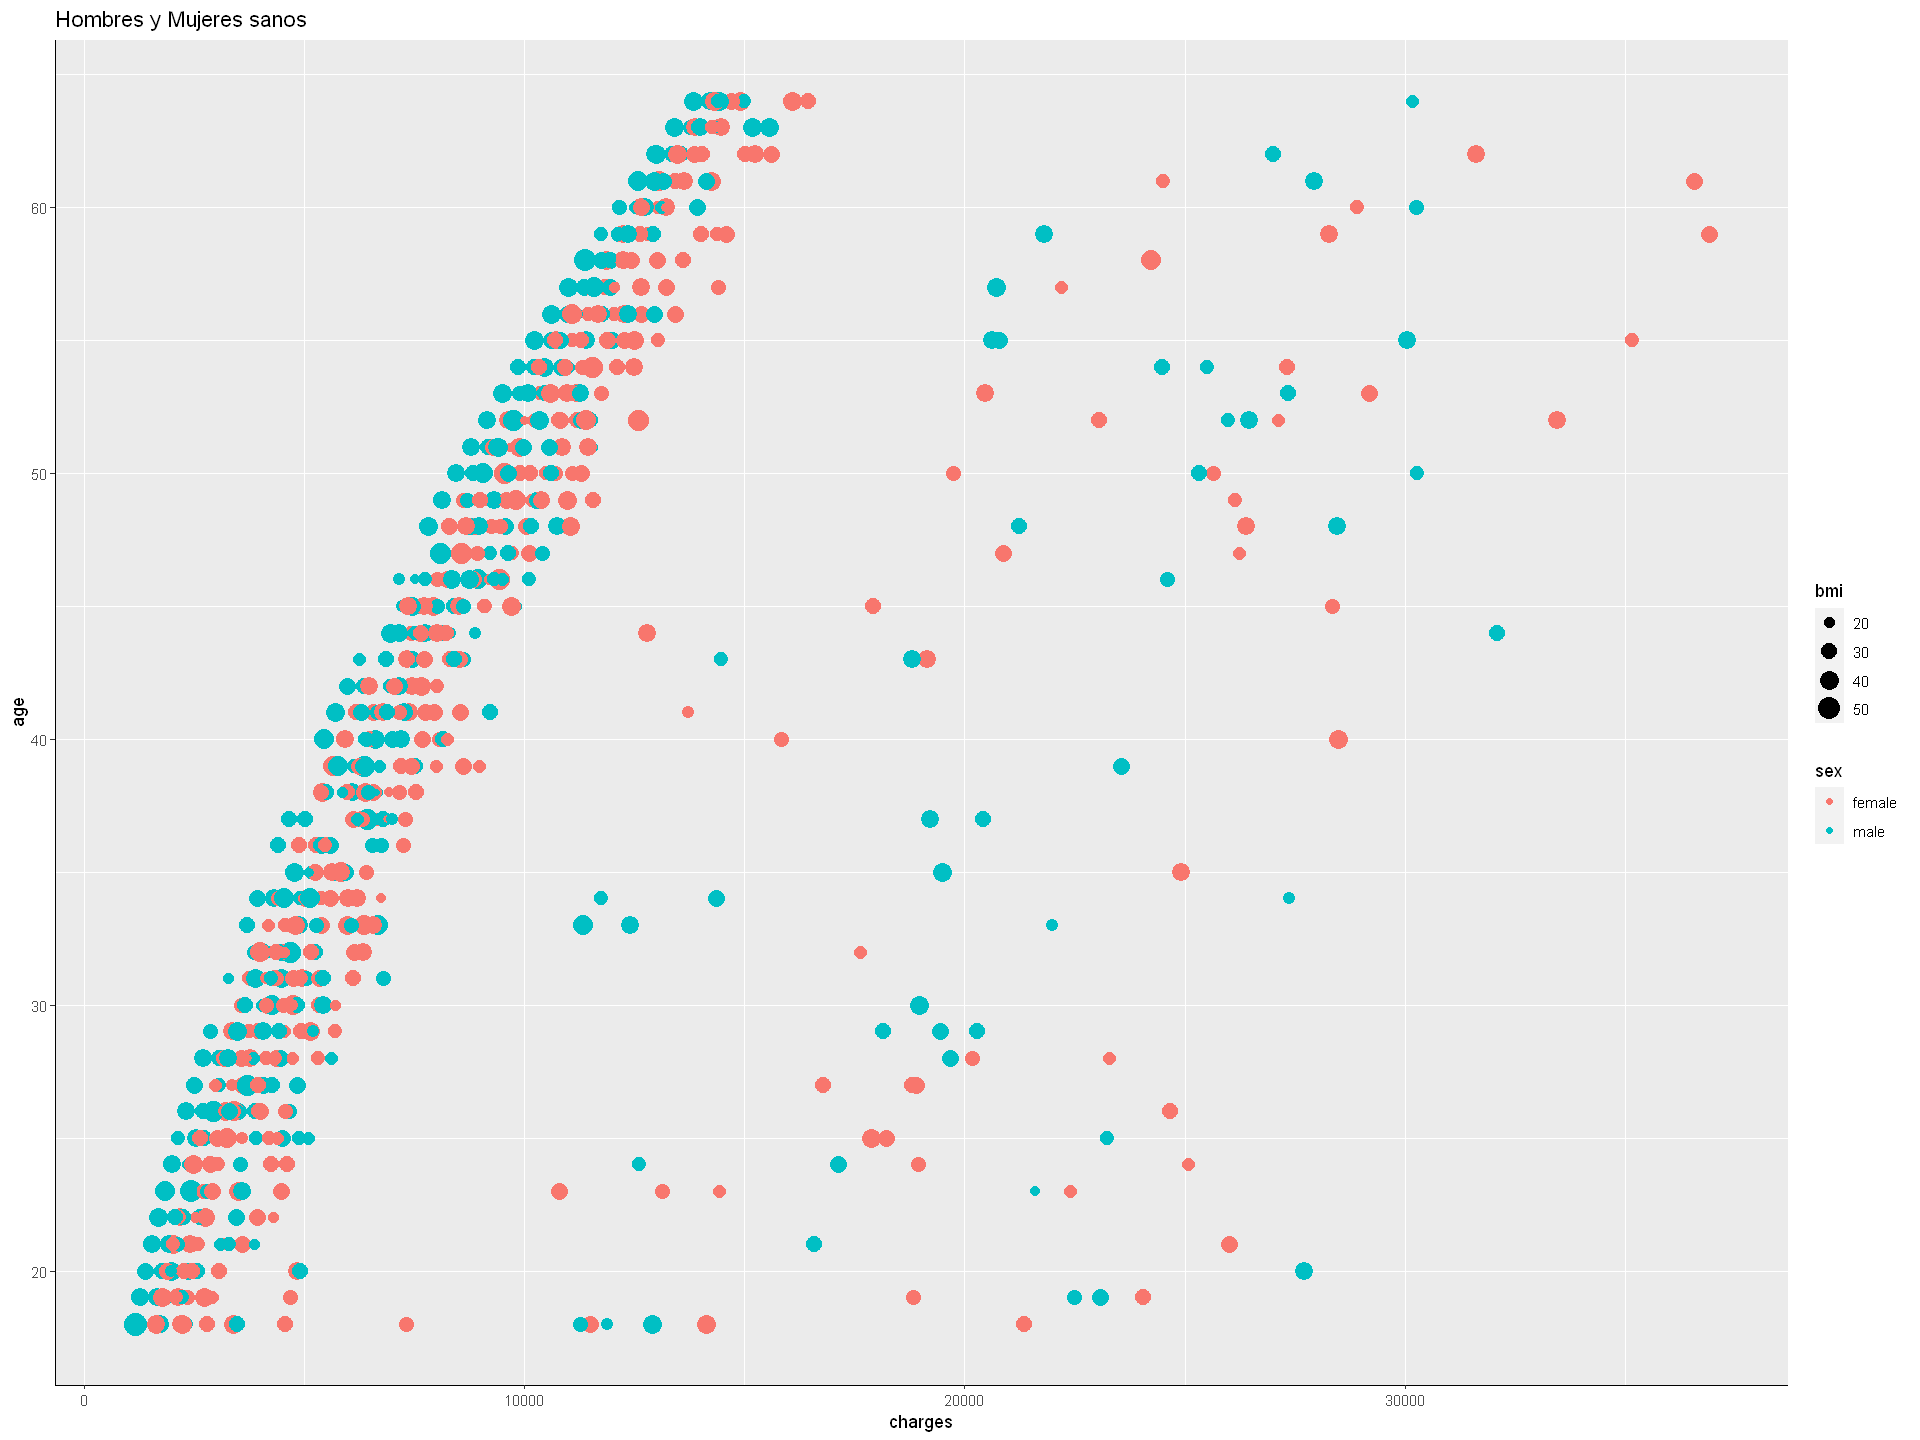

In [18]:
HyM_sanos <- group_by(df_seguros, sex, bmi, smoker, region, children, age)
HyM_sanos <- filter(HyM_sanos, smoker=="no")

ggplot(data=HyM_sanos, aes(x=charges, y=age, color=sex)) +
    # Colores y forma del boxplot
    geom_point(aes(size=bmi)) +
    # Título
    ggtitle("Hombres y Mujeres sanos") +
    # Personalización del tema
    theme(axis.line = element_line(colour = "black", size = 0.5))
    # Formato de texto

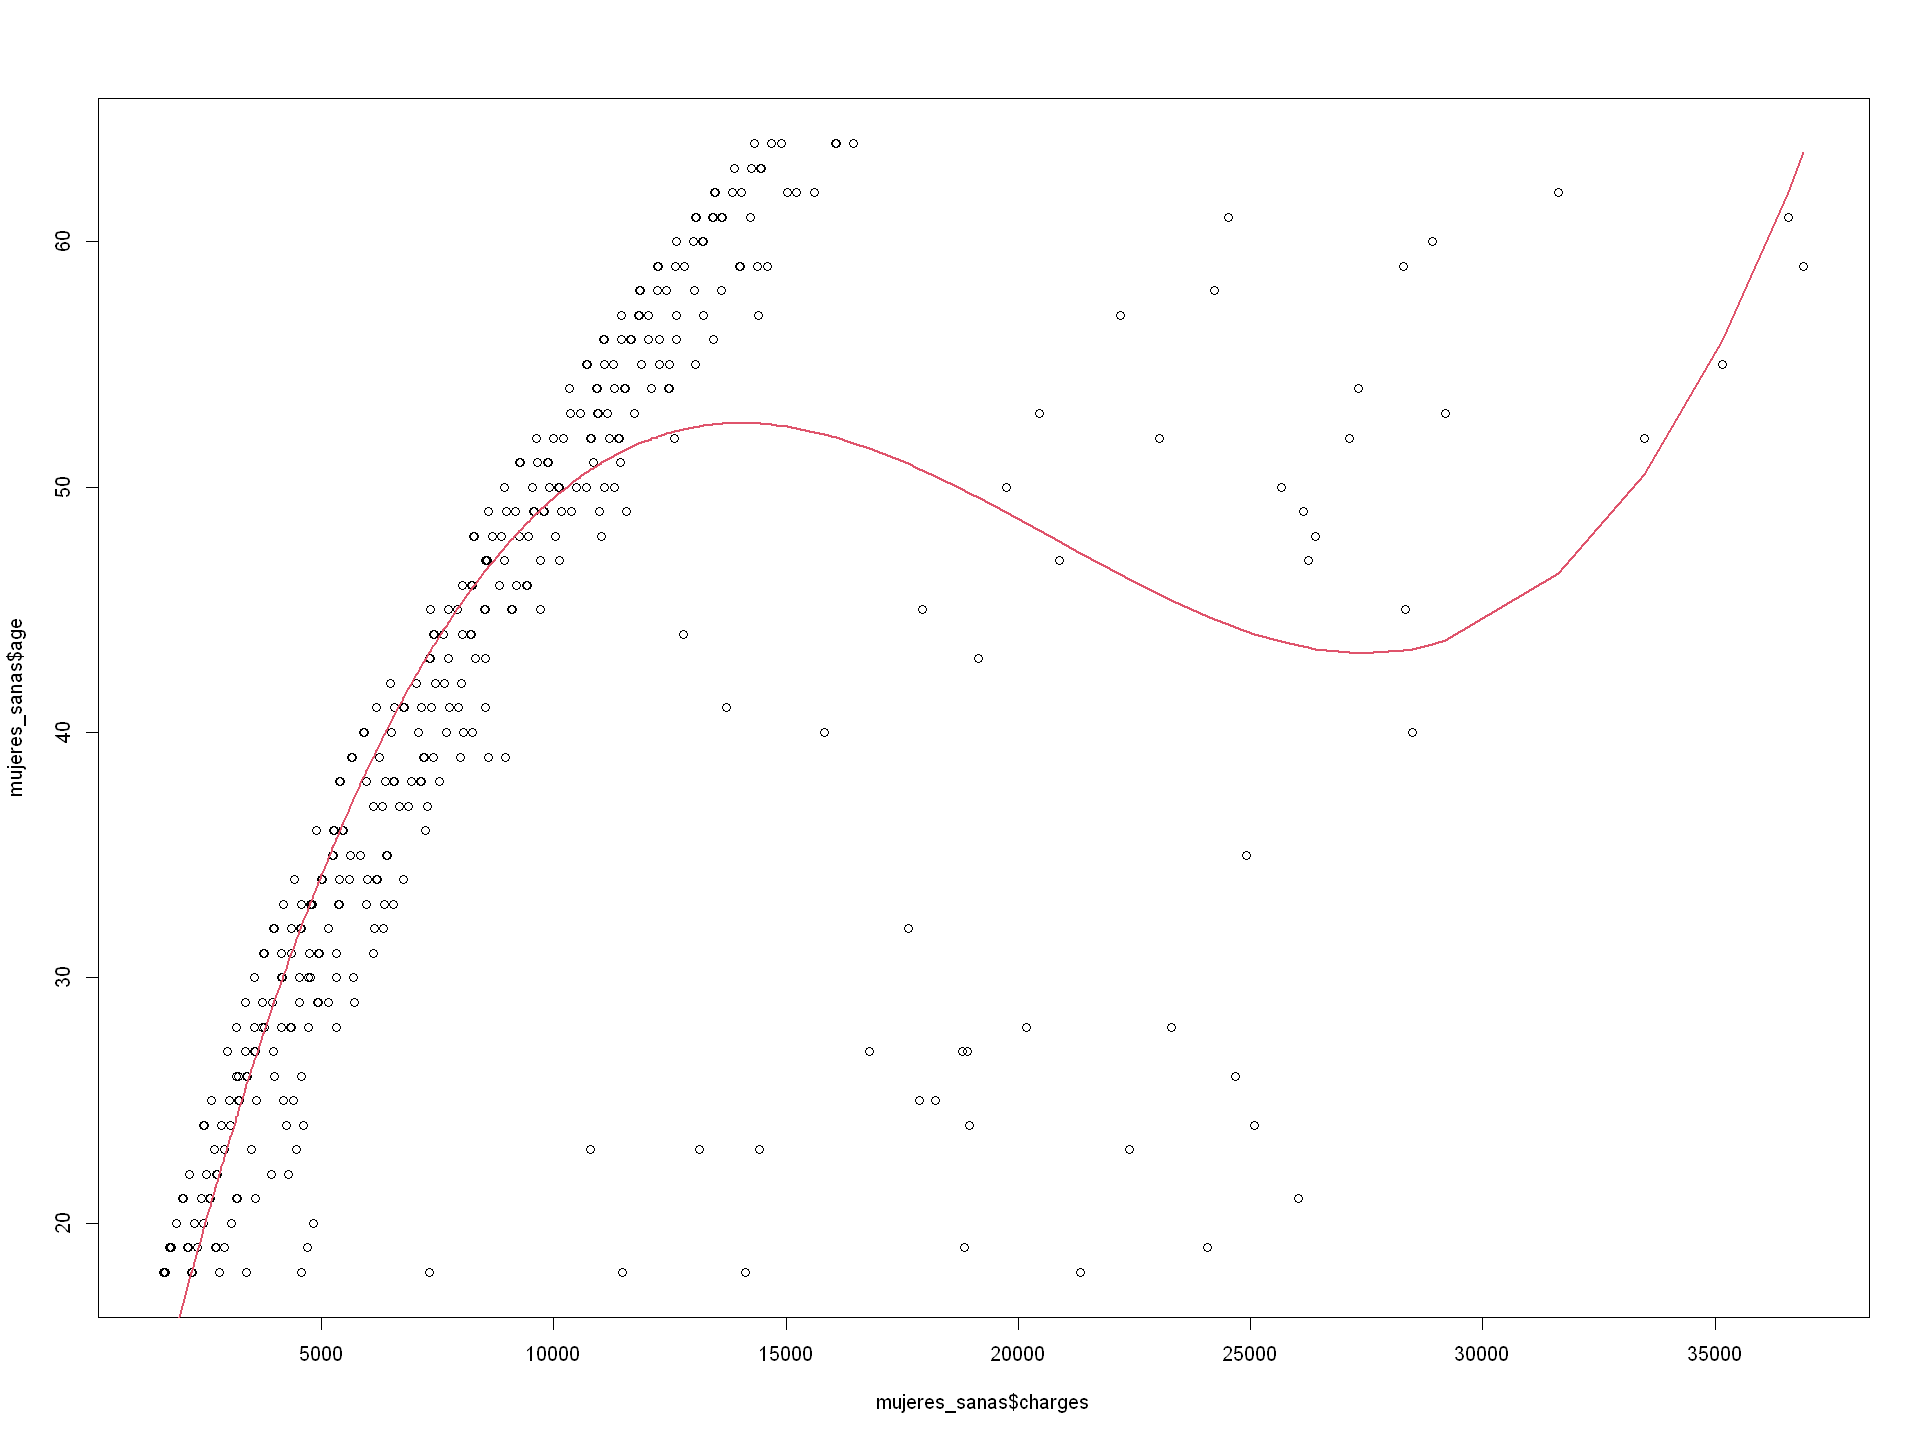

In [19]:
mujeres_sanas <- group_by(df_seguros, sex, bmi, smoker, region, children, age)
mujeres_sanas <- filter(mujeres_sanas, sex=="female", smoker=="no")

plot(x=mujeres_sanas$charges, y=mujeres_sanas$age)
model <- lm(mujeres_sanas$age ~ mujeres_sanas$charges + I(mujeres_sanas$charges^2) + I(mujeres_sanas$charges^3))
myPredict <- predict( model ) 
ix <- sort(mujeres_sanas$charges,index.return=T)$ix
lines(mujeres_sanas$charges[ix], myPredict[ix], col=2, lwd=2 )